# 0 Introduction

The purpose of this notebook is to demonstrate hierarchical clustering.  This can be used with stock data for the homework set

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['figure.figsize'] = 10, 6

# 1 Hierarchical clustering on random data

In [58]:
import pandas as pd
import numpy as np
np.random.seed(7)

In [59]:
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
import scipy.cluster.hierarchy as sch

# 1a: using Euclidean distance

Calculate the pairwise distance between 6 samples and put into 6x6 matrix 

In [60]:
# generate a dataframe random data
features=['x','y','z']
index = ['a%i'%i for i in range(0,6)]
X = np.random.random_sample([6,3])*20
df=pd.DataFrame(X, columns=features, index=index)

In [61]:
df

,x,y,z
a0,1.526166,15.598376,8.768185
a1,14.469304,19.559790,10.769917
a2,10.022409,1.441023,5.368780
a3,9.997650,13.584600,16.074781
a4,7.618823,1.318727,5.762912
a5,18.191871,4.267707,9.042479


In [6]:
df.iloc[0]

x     1.526166
y    15.598376
z     8.768185
Name: a0, dtype: float64

In [62]:
pdist(df, metric='euclidean')

array([13.68300235, 16.85742439, 11.36695584, 15.8133015 , 20.15452822,
       19.42258728,  9.15642722, 20.11804121, 15.83317262, 16.18905623,
        2.43875484,  9.39288621, 16.2001573 , 14.2619426 , 11.45606332])

In [63]:
# The Euclidean distance between a0 and a1

np.sum((df.iloc[0] - df.iloc[1])**2)**(0.5) 

13.683002354781607

In [9]:
dist=pd.DataFrame(squareform(pdist(df, metric='euclidean')), columns=index, index=index)
dist

,a0,a1,a2,a3,a4,a5
a0,0.000000,13.683002,16.857424,11.366956,15.813302,20.154528
a1,13.683002,0.000000,19.422587,9.156427,20.118041,15.833173
a2,16.857424,19.422587,0.000000,16.189056,2.438755,9.392886
a3,11.366956,9.156427,16.189056,0.000000,16.200157,14.261943
a4,15.813302,20.118041,2.438755,16.200157,0.000000,11.456063
a5,20.154528,15.833173,9.392886,14.261943,11.456063,0.000000


In [64]:
# different clusters are marked by different labels
#DataFrame.values
#Return a Numpy representation of the DataFrame.

cls=linkage(df.values, method='complete',metric='euclidean')

In [11]:
cls

array([[ 2.        ,  4.        ,  2.43875484,  2.        ],
       [ 1.        ,  3.        ,  9.15642722,  2.        ],
       [ 5.        ,  6.        , 11.45606332,  3.        ],
       [ 0.        ,  7.        , 13.68300235,  3.        ],
       [ 8.        ,  9.        , 20.15452822,  6.        ]])

In [12]:
cls2=linkage(df.values, method='single',metric='euclidean')
cls2

array([[ 2.        ,  4.        ,  2.43875484,  2.        ],
       [ 1.        ,  3.        ,  9.15642722,  2.        ],
       [ 5.        ,  6.        ,  9.39288621,  3.        ],
       [ 0.        ,  7.        , 11.36695584,  3.        ],
       [ 8.        ,  9.        , 14.2619426 ,  6.        ]])

<IPython.core.display.Javascript object>


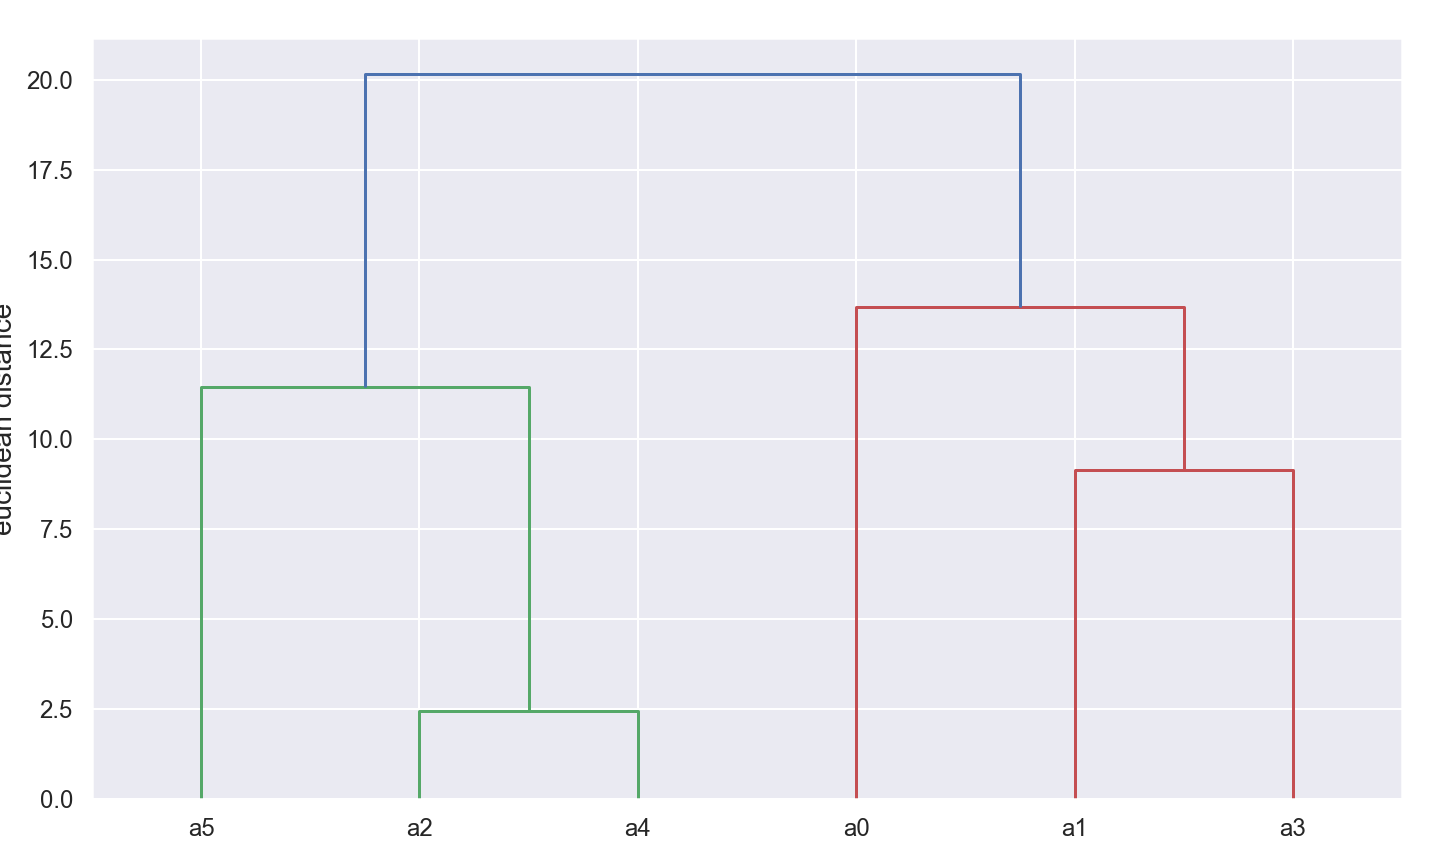

Text(53,0.5,'euclidean distance')

In [13]:
%matplotlib notebook
dendr=dendrogram(cls, labels=index)
plt.tight_layout()
plt.ylabel('euclidean distance')

# 1b: using sklearn

Yields same results.  Set n_clusters, and make a cut in the dendrogram above.  As you increase the number of clusters, you are moving "down" the dendrogram.

In [14]:
# sample cut of the dendrogram at 15.0
ac = AgglomerativeClustering(n_clusters=2,affinity='euclidean', linkage='complete')
ac.fit_predict(df)

array([0, 0, 1, 0, 1, 1])

In [15]:
# sample cut of the dendrogram at 12.5
ac = AgglomerativeClustering(n_clusters=3,affinity='euclidean', linkage='complete')
ac.fit_predict(df)

array([2, 1, 0, 1, 0, 0])

In [16]:
# sample cut of the dendrogram at 10.0
ac = AgglomerativeClustering(n_clusters=4,affinity='euclidean', linkage='complete')
ac.fit_predict(df)

array([2, 0, 1, 0, 1, 3])

In [17]:
# sample cut of the dendrogram at 5.0
ac = AgglomerativeClustering(n_clusters=5,affinity='euclidean', linkage='complete')
ac.fit_predict(df)

array([2, 4, 0, 3, 0, 1])

# 2 Now on stock data

In [65]:
df = pd.read_csv('spx_holdings_and_spx_closeprice.csv',parse_dates = ['Unnamed: 0'])
df.rename(columns = {'Unnamed: 0':'Date'},inplace = True)
df.set_index(['Date'],inplace = True)
df.drop(['SPX'],axis = 1,inplace = True)
df

,A,AA,AAPL,ABC,ABT,ADBE,ADI,ADM,ADP,ADSK,...,SPLS,STJ,SVU,SWY,TEG,TER,TGNA,THC,X,MAR.1
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-27,46.1112,78.9443,3.9286,4.5485,13.7898,15.6719,48.0313,10.8844,39.5477,8.1250,...,10.9498,5.5918,86.6178,26.3983,11.3873,65.8677,22.1921,60.9705,20.7086,12.2457
2000-01-28,45.8585,77.8245,3.6295,4.5485,14.2653,14.3906,47.7500,10.7143,38.5627,7.7188,...,10.3198,5.4520,82.4218,27.4137,11.2230,60.3487,21.7558,62.3032,20.1183,12.0742
2000-01-31,44.5952,78.0345,3.7054,4.3968,14.5730,13.7656,46.7500,10.6576,37.3807,7.6406,...,11.4298,5.5499,86.3181,28.2444,11.0862,62.1484,22.0533,60.6373,19.5772,12.1722
2000-02-01,47.8377,80.7640,3.5804,4.5333,14.7128,13.9688,49.0000,10.8844,37.9717,7.9219,...,11.3098,5.4240,83.0212,28.7982,11.1683,67.3674,22.2120,60.4708,19.5772,12.5151
2000-02-02,51.5434,83.4934,3.5290,4.5788,14.7968,15.3281,48.1250,10.6576,35.9032,7.9688,...,11.8798,5.3541,81.5226,28.6136,11.1956,68.9271,22.6483,62.4698,19.5281,12.3192
2000-02-03,52.3856,80.9039,3.6897,4.5485,14.8807,17.2656,52.8750,10.6576,38.3165,8.2500,...,11.9397,5.4939,80.6235,28.4290,11.3599,72.2265,22.7871,61.1371,19.2329,12.6375
2000-02-04,51.3750,78.9443,3.8571,4.4727,15.4121,18.5000,55.7500,10.6576,37.8240,8.1719,...,12.4797,5.6337,80.3238,28.7982,11.3051,69.8269,22.8664,62.3032,19.1345,13.2743
2000-02-07,53.5647,76.2848,4.0737,4.4423,15.1324,19.2656,59.5000,10.6576,36.6420,9.1406,...,12.3897,5.4660,80.9232,28.3367,11.2230,73.8462,22.1326,60.8039,18.7902,13.0294
2000-02-08,53.2279,73.8353,4.1027,4.3362,15.2723,20.9375,57.3750,10.6009,36.6912,9.8750,...,12.8397,5.4939,82.1220,28.1059,11.1956,74.3861,22.4103,61.1371,18.7410,13.1274


In [66]:
df_ret = df.pct_change(periods = 1).iloc[1:,:]

In [20]:
df_ret.head()

,A,AA,AAPL,ABC,ABT,ADBE,ADI,ADM,ADP,ADSK,...,SPLS,STJ,SVU,SWY,TEG,TER,TGNA,THC,X,MAR.1
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-28,-0.005480,-0.014185,-0.076134,0.000000,0.034482,-0.081758,-0.005857,-0.015628,-0.024907,-0.049994,...,-0.057535,-0.025001,-0.048443,0.038465,-0.014428,-0.083789,-0.019660,0.021858,-0.028505,-0.014005
2000-01-31,-0.027548,0.002698,0.020912,-0.033352,0.021570,-0.043431,-0.020942,-0.005292,-0.030651,-0.010131,...,0.107560,0.017957,0.047273,0.030302,-0.012189,0.029822,0.013675,-0.026739,-0.026896,0.008116
2000-02-01,0.072710,0.034978,-0.033735,0.031045,0.009593,0.014761,0.048128,0.021281,0.015810,0.036816,...,-0.010499,-0.022685,-0.038195,0.019607,0.007406,0.083976,0.007196,-0.002746,0.000000,0.028171
2000-02-02,0.077464,0.033795,-0.014356,0.010037,0.005709,0.097310,-0.017857,-0.020837,-0.054475,0.005920,...,0.050399,-0.012887,-0.018051,-0.006410,0.002444,0.023152,0.019643,0.033057,-0.002508,-0.015653
2000-02-03,0.016340,-0.031014,0.045537,-0.006617,0.005670,0.126402,0.098701,0.000000,0.067217,0.035288,...,0.005042,0.026111,-0.011029,-0.006451,0.014675,0.047868,0.006128,-0.021334,-0.015117,0.025838


In [67]:
df_sample = df_ret.dropna(axis=1).sample(n=20, axis=1)

In [68]:
dist = squareform(pdist(df_sample.transpose().values, metric='euclidean'))

In [69]:
df_dist = pd.DataFrame(data=dist, columns=df_sample.columns, index=df_sample.columns)

In [70]:
df_dist.head()

,HOT,TMO,LEG,M,KR,PDCO,MU,R,RSG,COP,FOXA,STJ,GHC,BLL,HOG,PEP,PCG,ATI,CELG,RHI
HOT,0.000000,1.549971,1.405784,1.545901,1.631251,1.664120,2.224285,1.470935,1.571612,1.519424,1.337688,1.696326,1.489384,1.461880,1.441867,1.595802,1.873927,1.878083,2.199596,1.571148
TMO,1.549971,0.000000,1.313954,1.590445,1.356869,1.361403,2.207311,1.414939,1.271646,1.272472,1.253468,1.346616,1.238825,1.220772,1.476146,1.211306,1.633017,1.902665,1.895852,1.466475
LEG,1.405784,1.313954,0.000000,1.470816,1.340930,1.410865,2.200836,1.311388,1.291748,1.270325,1.275374,1.420444,1.226740,1.152502,1.369948,1.240756,1.618266,1.846698,2.028644,1.424486
M,1.545901,1.590445,1.470816,0.000000,1.668325,1.724403,2.304488,1.561012,1.630531,1.607016,1.486412,1.722876,1.543403,1.519834,1.526978,1.582763,1.922129,2.021534,2.257433,1.644184
KR,1.631251,1.356869,1.340930,1.668325,0.000000,1.473871,2.387851,1.497023,1.332793,1.320808,1.448027,1.400310,1.282634,1.264356,1.589168,1.137547,1.545208,2.058786,2.076879,1.617124


In [71]:
# apply hierarchical clustering to the stock distance matrix 
cls=linkage(df_sample.transpose().values, method='complete',metric='euclidean')

In [26]:
df_sample.shape

(3505, 20)

In [72]:
cls

array([[13.        , 15.        ,  1.10782452,  2.        ],
       [ 9.        , 20.        ,  1.13755027,  3.        ],
       [12.        , 21.        ,  1.21268045,  4.        ],
       [ 1.        , 10.        ,  1.25346781,  2.        ],
       [ 2.        , 22.        ,  1.27032462,  5.        ],
       [ 8.        , 24.        ,  1.29174757,  6.        ],
       [ 4.        , 25.        ,  1.3409297 ,  7.        ],
       [ 5.        , 11.        ,  1.40744244,  2.        ],
       [ 7.        , 14.        ,  1.41260168,  2.        ],
       [23.        , 26.        ,  1.44802707,  9.        ],
       [ 0.        , 28.        ,  1.47093483,  3.        ],
       [27.        , 29.        ,  1.47387064, 11.        ],
       [ 3.        , 30.        ,  1.56101208,  4.        ],
       [19.        , 31.        ,  1.64262229, 12.        ],
       [32.        , 33.        ,  1.72440258, 16.        ],
       [16.        , 34.        ,  1.92212927, 17.        ],
       [17.        , 35.

In [28]:
df_dist.iloc[10].values[19]

1.4296536027240343

<IPython.core.display.Javascript object>


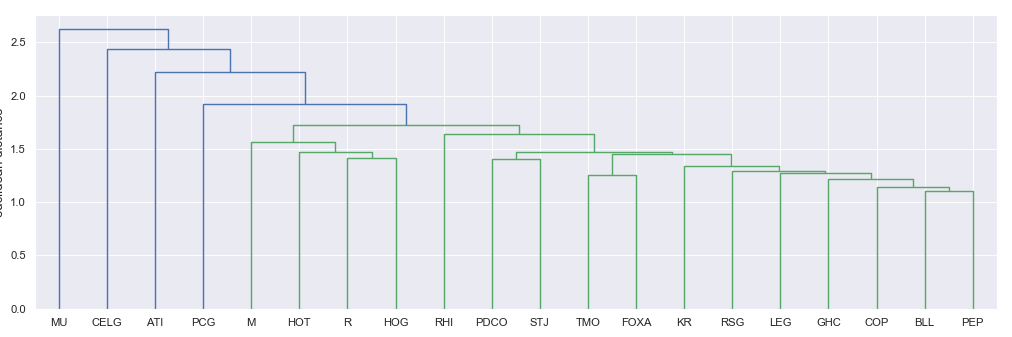

Text(104.625, 0.5, 'euclidean distance')

In [73]:
%matplotlib notebook
plt.figure(figsize=(15,5))
dendr=dendrogram(cls, labels=df_sample.columns)
plt.tight_layout()
plt.ylabel('euclidean distance')

daily return might be too noisy. Try cluserting based on distance of 5 day returns. You will see that the clustering changes. 

# 4. Portfolios

In [74]:
cov_mat = df_ret.cov().values
corr_mat = df_ret.corr().values

In [75]:
np.linalg.cond(cov_mat)

14730.145242416947

Code from MLdp website

In [76]:
def getIVP(cov):
    # Compute the inverse-variance portfolio
    ivp = 1. / np.diag(cov)
    ivp /= ivp.sum()
    return ivp

In [77]:
w_ivp = getIVP(cov_mat)

In [34]:
def getHRP(cov, corr):
    # Construct a hierarchical portfolio
    dist = correlDist(corr)
    link = sch.linkage(dist, 'single')
    #dn = sch.dendrogram(link, labels=cov.index.values, label_rotation=90)
    #plt.show()
    sortIx = getQuasiDiag(link)
    sortIx = corr.index[sortIx].tolist()
    hrp = getRecBipart(cov, sortIx)
    return hrp.sort_index()

In [35]:
def correlDist(corr):
    # A distance matrix based on correlation, where 0<=d[i,j]<=1
    # This is a proper distance metric
    dist = ((1 - corr) / 2.)**.5  # distance matrix
    return dist


def getQuasiDiag(link):
    # Sort clustered items by distance
    link = link.astype(int)
    sortIx = pd.Series([link[-1, 0], link[-1, 1]])
    numItems = link[-1, 3]  # number of original items
    while sortIx.max() >= numItems:
        sortIx.index = range(0, sortIx.shape[0] * 2, 2)  # make space
        df0 = sortIx[sortIx >= numItems]  # find clusters
        i = df0.index
        j = df0.values - numItems
        sortIx[i] = link[j, 0]  # item 1
        df0 = pd.Series(link[j, 1], index=i + 1)
        sortIx = sortIx.append(df0)  # item 2
        sortIx = sortIx.sort_index()  # re-sort
        sortIx.index = range(sortIx.shape[0])  # re-index
    return sortIx.tolist()

def getRecBipart(cov, sortIx):
    # Compute HRP alloc
    w = pd.Series(1, index=sortIx)
    cItems = [sortIx]  # initialize all items in one cluster
    while len(cItems) > 0:
        cItems = [i[j:k] for i in cItems for j, k in ((0, len(i) // 2), (len(i) // 2, len(i))) if len(i) > 1]  # bi-section
        for i in range(0, len(cItems), 2):  # parse in pairs
            cItems0 = cItems[i]  # cluster 1
            cItems1 = cItems[i + 1]  # cluster 2
            cVar0 = getClusterVar(cov, cItems0)
            cVar1 = getClusterVar(cov, cItems1)
            alpha = 1 - cVar0 / (cVar0 + cVar1)
            w[cItems0] *= alpha  # weight 1
            w[cItems1] *= 1 - alpha  # weight 2
    return w

def getClusterVar(cov,cItems):
    # Compute variance per cluster
    cov_=cov.loc[cItems,cItems] # matrix slice
    w_=getIVP(cov_).reshape(-1,1)
    cVar=np.dot(np.dot(w_.T,cov_),w_)[0,0]
    return cVar

In [36]:
w_hrp = getHRP(df_ret.cov(), df_ret.corr())

/Users/kyokumorimatsu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  after removing the cwd from sys.path.


In [37]:
np.vstack((w_ivp, w_hrp)).transpose().shape

(418, 2)

In [38]:
df_results = pd.DataFrame(index = df_ret.columns, data=np.vstack((w_ivp, w_hrp)).transpose())

In [39]:
df_results

,0,1
A,0.001164,0.001999
AA,0.001479,0.004799
AAPL,0.001390,0.000509
ABC,0.002963,0.001570
ABT,0.004641,0.002705
ADBE,0.001194,0.002749
ADI,0.001284,0.001489
ADM,0.002520,0.000650
ADP,0.004224,0.003020
ADSK,0.001419,0.001732


## --- Finished --- ##